Accuracy: 0.8869
Precision: 0.6548
Recall: 0.0437
F1_score: 0.0820
Roc_auc: 0.5204


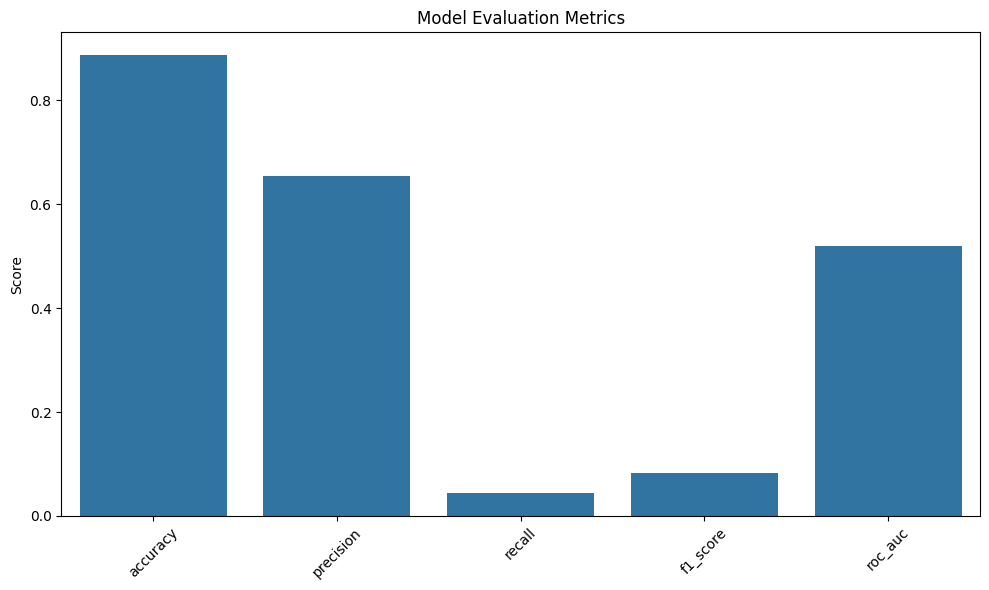

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.preprocessing import preprocess_data
from src.model import train_model, save_model, predict
from src.evaluation import evaluate_model, print_metrics

# Load and preprocess data
file_path = '../data/loan_data.csv'
X_train, X_test, y_train, y_test, scaler = preprocess_data(file_path, target_column='Default')

# Train model
model = train_model(X_train, y_train)

# Save model
save_model(model, 'model.pkl')

# Make predictions
y_pred = predict(model, X_test)

# Evaluate model
metrics = evaluate_model(y_test, y_pred)
print_metrics(metrics)

# Visualize evaluation metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Add this after y_pred = predict(model, X_test)
print("\nSample Predictions vs Actual Labels:")
for i in range(min(10, len(y_test))):  # Show up to 10 samples
    pred = "Default" if y_pred[i] == 1 else "Not Default"
    actual = "Default" if y_test.iloc[i] == 1 else "Not Default"
    print(f"Sample {i}: Predicted: {pred}, Actual: {actual}")


Sample Predictions vs Actual Labels:
Sample 0: Predicted: Not Default, Actual: Not Default
Sample 1: Predicted: Not Default, Actual: Not Default
Sample 2: Predicted: Not Default, Actual: Not Default
Sample 3: Predicted: Not Default, Actual: Not Default
Sample 4: Predicted: Not Default, Actual: Not Default
Sample 5: Predicted: Not Default, Actual: Not Default
Sample 6: Predicted: Not Default, Actual: Not Default
Sample 7: Predicted: Not Default, Actual: Not Default
Sample 8: Predicted: Not Default, Actual: Not Default
Sample 9: Predicted: Not Default, Actual: Not Default


In [17]:
print("\nAll Predictions vs Actual Labels:")
results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(results)


All Predictions vs Actual Labels:
        Predicted  Actual
51139           0       0
71005           0       0
35684           0       0
174087          0       0
137952          0       0
...           ...     ...
35991           0       0
69680           0       0
184743          0       0
209406          0       0
123164          0       0

[51070 rows x 2 columns]


In [18]:
print("\nLoans Predicted as Default:")
default_preds = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})[y_pred == 1]
print(default_preds)


Loans Predicted as Default:
        Predicted  Actual
201544          1       1
122127          1       0
62043           1       1
150312          1       1
167048          1       0
...           ...     ...
92984           1       1
206534          1       0
215228          1       1
225429          1       0
230663          1       1

[394 rows x 2 columns]


In [19]:
df = pd.read_csv('../data/loan_data.csv')
print("Unique values in Default column:", df['Default'].unique())

Unique values in Default column: [0 1]


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.preprocessing import preprocess_data
from src.model import train_model, save_model, predict
from src.evaluation import evaluate_model, print_metrics

# Check unique values and distribution
df = pd.read_csv('../data/loan_data.csv')
print("Unique values in Default column:", df['Default'].unique())
print("Default column value counts:\n", df['Default'].value_counts())

# Load and preprocess data
file_path = '../data/loan_data.csv'
X_train, X_test, y_train, y_test, scaler = preprocess_data(file_path, target_column='Default')

# Train model
model = train_model(X_train, y_train)

# Save model
save_model(model, 'model.pkl')

# Make predictions
y_pred = predict(model, X_test)

# Evaluate model
metrics = evaluate_model(y_test, y_pred)
print_metrics(metrics)

# Check all predictions
print("\nSample Predictions vs Actual Labels:")
for i in range(min(10, len(y_test))):
    pred = "Default" if y_pred[i] == 1 else "Not Default"
    actual = "Default" if y_test.iloc[i] == 1 else "Not Default"
    print(f"Sample {i}: Predicted: {pred}, Actual: {actual}")

# Check loans predicted as default
print("\nLoans Predicted as Default:")
default_preds = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})[y_pred == 1]
print(default_preds)

Unique values in Default column: [0 1]
Default column value counts:
 Default
0    225694
1     29653
Name: count, dtype: int64
Accuracy: 0.8869
Precision: 0.6548
Recall: 0.0437
F1_score: 0.0820
Roc_auc: 0.5204

Sample Predictions vs Actual Labels:
Sample 0: Predicted: Not Default, Actual: Not Default
Sample 1: Predicted: Not Default, Actual: Not Default
Sample 2: Predicted: Not Default, Actual: Not Default
Sample 3: Predicted: Not Default, Actual: Not Default
Sample 4: Predicted: Not Default, Actual: Not Default
Sample 5: Predicted: Not Default, Actual: Not Default
Sample 6: Predicted: Not Default, Actual: Not Default
Sample 7: Predicted: Not Default, Actual: Not Default
Sample 8: Predicted: Not Default, Actual: Not Default
Sample 9: Predicted: Not Default, Actual: Not Default

Loans Predicted as Default:
        Predicted  Actual
201544          1       1
122127          1       0
62043           1       1
150312          1       1
167048          1       0
...           ...     ...
9